# On regarde les données disponibles

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Load the Excel file
file_path = '/home/leo/Documents/These/Données/Rearangement_OB2.xlsx'  # Replace with the path to your file
df = pd.read_excel(file_path)

/home/leo/micromamba/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [29]:

# Filter rows where 'species' column is equal to 'ae_poly'
filtered_df = df[(df['Spc'] == 'ae_poly') & (df['Motu'] == 'Onetahi')]

# Clean 'Nb_ind' column by replacing 'NA ' or NaN values with 0
filtered_df['Nb_ind'] = pd.to_numeric(filtered_df['Nb_ind'], errors='coerce').fillna(0)

# Ensure 'Date' column is in datetime format
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'], errors='coerce')

# Display the filtered data
print(filtered_df)

# Optionally, save the filtered data to a new Excel file
filtered_df.to_excel('ae_poly_data.xlsx', index=False)

/tmp/ipykernel_16393/60778001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Nb_ind'] = pd.to_numeric(filtered_df['Nb_ind'], errors='coerce').fillna(0)
/tmp/ipykernel_16393/60778001.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'], errors='coerce')


             Year     Month                          Date  Sem_num       Ile  \
6       Year_2014   January 2014-01-04 00:00:00.000000000       52  Tetiaroa   
7       Year_2014   January 2014-01-04 00:00:00.000000000       52  Tetiaroa   
8       Year_2014   January 2014-01-04 00:00:00.000000000       52  Tetiaroa   
12      Year_2014   January 2014-01-04 00:00:00.000000000       52  Tetiaroa   
13      Year_2014   January 2014-01-04 00:00:00.000000000       52  Tetiaroa   
...           ...       ...                           ...      ...       ...   
145055  Year_2024  November 1970-01-01 00:00:00.000000019       47  Tetiaroa   
145056  Year_2024  November 1970-01-01 00:00:00.000000019       47  Tetiaroa   
145057  Year_2024  November 1970-01-01 00:00:00.000000019       47  Tetiaroa   
145058  Year_2024  November 1970-01-01 00:00:00.000000019       47  Tetiaroa   
145139  Year_2024  November 1970-01-01 00:00:00.000000019       47  Tetiaroa   

           Motu Trap_type Trap_num  Dur

In [30]:

# Split the dataset based on the 'action' column
df_r = filtered_df[filtered_df['Action'] == 'Release']  # Rows where 'action' is 'R'
df_c = filtered_df[filtered_df['Action'] == 'Capture']  # Rows where 'action' is 'C']

df_r.fillna(0, inplace=True)
df_c.fillna(0, inplace=True)
# Ensure 'date' column is in datetime format
df_r['Date'] = pd.to_datetime(df_r['Date'])
df_c['Date'] = pd.to_datetime(df_c['Date'])

/tmp/ipykernel_16393/2452671381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r.fillna(0, inplace=True)
/tmp/ipykernel_16393/2452671381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.fillna(0, inplace=True)
/tmp/ipykernel_16393/2452671381.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['Date'] = pd.to_datetime(df_r['Date'])
/tmp/ipykernel_16393/2452671

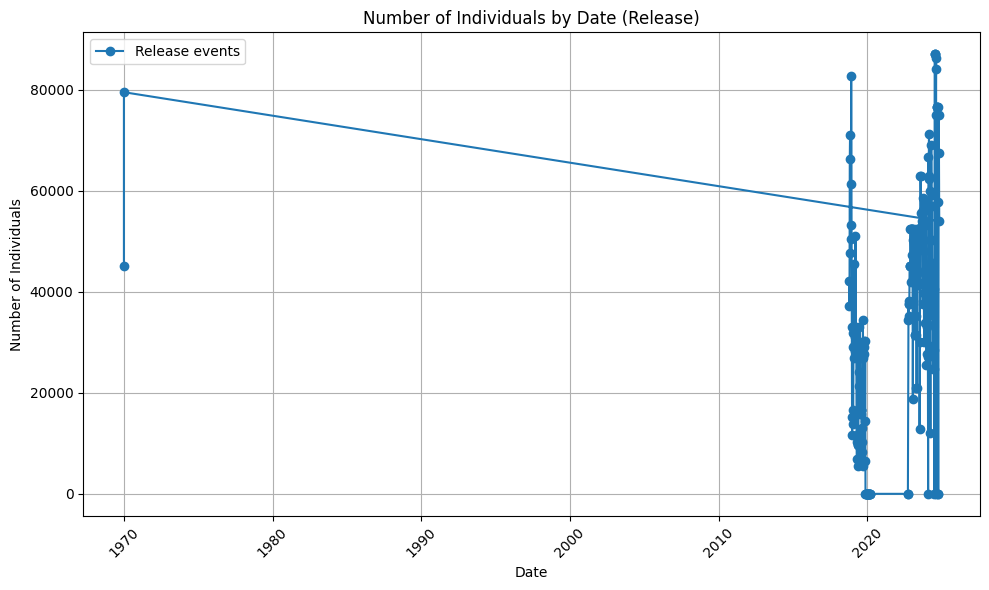

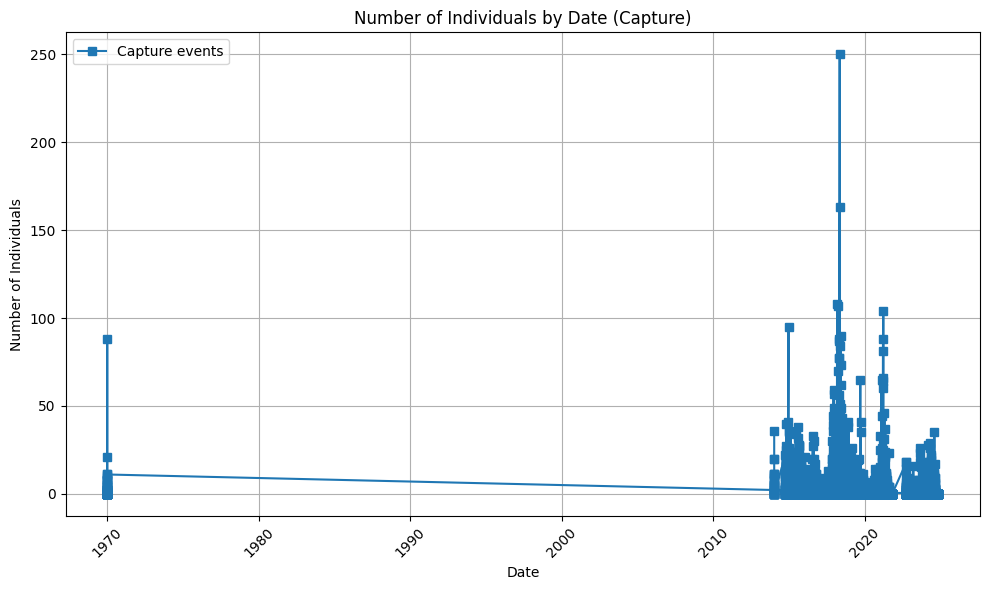

In [32]:
# Plot the data for Release events
plt.figure(figsize=(10, 6))
plt.plot(df_r['Date'], df_r['Nb_ind'], label='Release events', marker='o')
plt.title('Number of Individuals by Date (Release)')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the data for Capture events
plt.figure(figsize=(10, 6))
plt.plot(df_c['Date'], df_c['Nb_ind'], label='Capture events', marker='s')
plt.title('Number of Individuals by Date (Capture)')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()